# Constructing an energy balance model

The model will only consider Planck response i.e. direct radiation effect.

In [2]:
#import relevant modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## An oversimplified model

The <b>energy flux density at the surface of the Earth</b> can be calculated from the <b>inverse square law</b>, given the power of the Sun $3.86$x$10^{26}W$ ($E_S$), and the distance between the Sun and the Earth $1.5$x$10^{11}m$ ($R$): 

$$S_o=\frac{E_S}{4\pi R^{2}}$$

This is the <b>solar constant $S_o$</b>, which is roughly 1365 $Wm^{-2}$.

Energy balance model is crucial in building a climate model, since atmospheric dynamics are driven by the input of energy into the climate system. 

Let's first make several <b>assumptions</b> about the Earth:
1. It is a perfect blackbody
2. Its albedo is 0.3, which is the average terrestrial albedo
3. It is in radiative equilibrium i.e. energy in = energy out
4. Equal solar irradiation on the surface of the Earth

Recall that albedo is the <b>reflectance of an object over all wavelengths</b>, which measures how well a surface reflects EM radiation. Its value is between 0 and 1, for example 0.1 means 10% of EM radiation incident on the object is reflected, so 90% of it is absorbed. Therefore, albedo is higher for <b>ice and snow (0.9)</b> than that for <b>water (0.06)</b>.

From here, we can start by calculating the energy flux density on the surface of the Earth. 

Earth radius = $R_E$; albedo = $α$ 

We already know the energy flux density at the surface of the Earth = the solar constant $S_o$, so the energy flux density including albedo becomes $S_oA(1-α)$. 

Thus, the energy flux density ($Wm^{-2}$) into the Earth is:

$$M_{in}=S_o(1-α)$$ 

In terms of total energy flux ($W$):

$$E_{in}=S_o\pi R_E^2(1-α)$$

The energy flux density emitted is described by <b>Stefan-Boltzmann Law</b>:

$$M_{out}=σ𝑇_K^{4}$$

where σ=<b>Stefan-Boltzmann constant</b>=$5.6697$x$10^{-8}Wm^{-2}K^{-4}$, and $T_K$ is <b>absolute temperature</b>. In terms of total energy flux:

$$E_{out}=4\pi R_E^2σ𝑇_K^{4}$$

At <b>radiative equilibrium</b>, energy absorbed = energy emitted, thus:

$$E_{in}=E_{out}$$

$$S_o\pi R_E^2(1-α)=4\pi R_E^{2}σ𝑇_K^{4}$$

Eliminating $\pi$ and $R_E$ gives:

$$\frac{S_o(1-α)}{4}=σ𝑇_K^{4}$$ 

Rearranging this equation gives the temperature at the surface of the Earth:

$$T_K=(\frac{S_o(1-α)}{4σ})^{\frac{1}{4}}$$

Substituting albedo=0.3, temperature on the surface of the Earth is <b>-18˚C</b>.

When albedo = 0.3, temperature on Earth is -17˚C.
Even when albedo = 0.0, temperature on Earth would still only be 5˚C


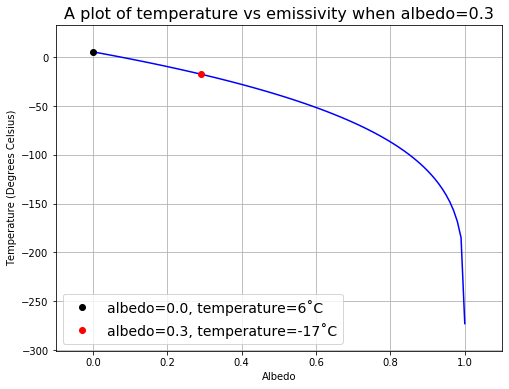

In [9]:
# define a function to calculate temperature in degrees Celsius for a given albedo
# al = albedo, s = stefan-boltzmann constant
def find_temp(al, S_o=1365, s=5.67e-8):
    return ((S_o*(1-al))/(4*s))**0.25-273

# make a list of albedo between 0 and 1
albedo = np.array([0.01*i for i in range(101)])

# calculate temperature for each albedo
temp = find_temp(albedo)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(albedo, temp, 'b')
ax1.plot(albedo[0], temp[0], 'ko', label='albedo=%.1f, temperature=%.f˚C' % (albedo[0], temp[0]))
ax1.plot(albedo[29], temp[29], 'ro', label='albedo=%.1f, temperature=%.f˚C' % (albedo[29], temp[29])) 
ax1.set_xlabel('Albedo')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs emissivity when albedo=0.3', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

print("When albedo = %.1f, temperature on Earth is %.d˚C." % (albedo[29], temp[29])) 
print("Even when albedo = %.1f, temperature on Earth would still only be %.d˚C" % (albedo[0], temp[0]))

But the average temperature on Earth should be <b>14˚C</b>, a difference of 32˚C. Something must be seriously wrong.

Actually, some of the assumptions are not valid and are too simple.

#### Assumption 1 

The Earth is not a perfect blackbody, because it doesn't radiate perfectly.

#### Assumption 2 

Albedo = 0.3 is actually accurate. As you'll see below, after accounting for the Earth being an imperfect blackbody, the temperature calculated is correct.

#### Assumption 3

Equilibrium is easily disturbed, especially by <b>positive feedbacks</b>.

#### Assumption 4 

The Earth is a sphere, so heat absorbtion (and heat emission) is not uniform.

## A less oversimplified model

To improve the model and address assumption 1, <b>emissivity ε</b> is introduced to describe the difference in the range of radiation emitted between the object and an ideal black body.

Including this 'fudge factor', Stefan-Boltzmann Law becomes:

$$M_{out}=εσT_K^{4}$$

Or in terms of total energy flux:

$$E_{out}=4\pi R_E^2εσT_K^{4}$$

Recall that $E_{in}=S_o\pi R_E^2(1-α)$, and $E_{in}=E_{out}$:

$$S_o\pi R_E^2(1-α)=4\pi R_E^2εσT_K^{4}$$

Eliminating $\pi$ and $R_E^2$: 

$$\frac{1}{4}S_o(1-α)=εσT_K^{4}$$

In the equation above, LHS gives <b>energy flux density into the Earth</b>, and RHS gives <b>energy flux density out of the Earth</b>.

Rearranging for $T_K$ gives:

$$T_K=(\frac{S_o(1-α)}{4εσ})^{\frac{1}{4}}$$

Emissivity of the Earth is found to be 0.62, and substituting albedo = 0.3 into the equation, temperature on Earth becomes 14˚C, which is what we expect. Therefore, the assumption that Earth's albedo is 0.3 is valid.

When emissivity=0.62 and albedo=0.3, temperature on Earth becomes 14˚C.


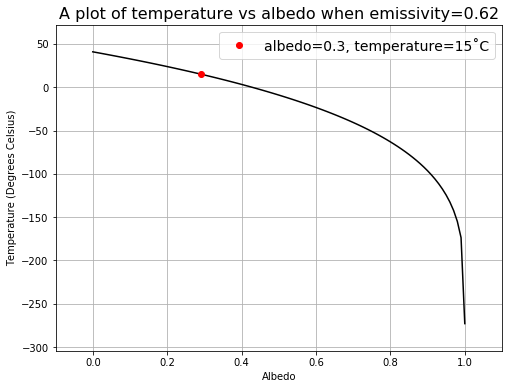

In [6]:
# define a function to find the temperature 
def find_new_temp(al, S_o=1365, e=0.62, s=5.67e-8):
    return ((S_o*(1-al))/(4*e*s))**0.25-273

print("When emissivity=0.62 and albedo=0.3, temperature on Earth becomes %.d˚C." % (find_new_temp(0.3)))

# make a list of values of albedo between 0 and 1
albedo = np.array([0.01*i for i in range(101)])

#calculate temperature with emissivity
new_temp = find_new_temp(albedo)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(albedo, new_temp, 'k')
# emissivity = 0.62 is at index 61
ax1.plot(albedo[29], new_temp[29], 'ro', label='albedo=%.1f, temperature=%.d˚C' % (albedo[29], new_temp[29]))
ax1.set_xlabel('Albedo')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs albedo when emissivity=0.62', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

## Greenhouse effect

As we all know, greenhouse effect leads to a rise in temperature. This is because greenhouse gases have a positive <b>radiative forcing</b>, or positive <b>net change in the energy balance of the Earth system</b>. As a result, there is a net increase in energy coming into the Earth system, and thus warming.

Accounting for greenhouse effect, the temperature on Earth is calculated as following:

$$T_C=\frac{\frac{1}{4}S_o(1-α)-a}{b}$$

where $a=εσT_o^{4}$ and $b=4εσT_o^{3}$ are constants.

a is the constant coefficient for longwave radiation $= εσT_o^{4}=195Wm^{-2}$

b is temperature-dependent coefficient for longwave radiation $= 4εσT_o^{3}=2.9Wm^{-2}˚C^{-1}$

When emissivity=0.62 and albedo=0.3, accounting for greenhouse effect, temperature on Earth becomes 15˚C


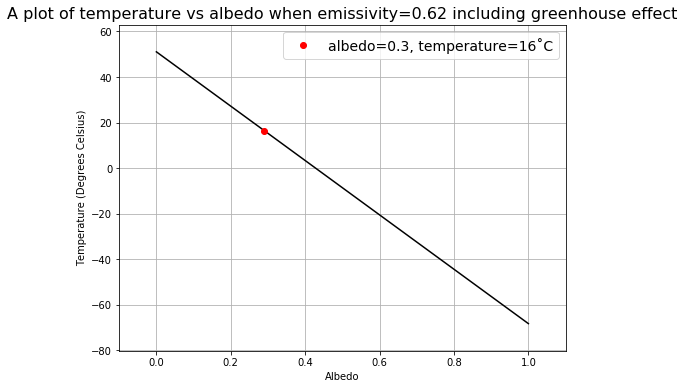

In [8]:
# define function for calculating T_C with a given emissivity
def greenhouse_TC(al, s=5.67e-8, T_o=273, S_o=1365, e=0.62):
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (0.25*S_o*(1-al)-a)/b

print("When emissivity=0.62 and albedo=0.3, accounting for greenhouse effect, temperature on Earth becomes %.d˚C" 
     % (greenhouse_TC(0.3)))

# make a list of emissivity between 0 and 1
al = np.array([0.01*i for i in range(101)])
T_C = greenhouse_TC(al)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(al, T_C, 'k')
ax1.plot(al[29], T_C[29], 'ro', label='albedo=%.1f, temperature=%.d˚C' % (al[29], T_C[29]))
ax1.set_xlabel('Albedo')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature vs albedo when emissivity=0.62 including greenhouse effect', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

Based on simplified approximation of radiative forcing caused by changes in concentration of CO$_2$, the <b>increase in temperature from doubling CO$_2$ concentration</b> compared to a base level is <b>climate sensibility</b>, which is a constant of around <b>1˚C</b> for a pure Planck response.

For the study of climate change, climate sensibility refers to temperature change associated with doubling of CO$_2$ concentration from pre-industrial levels of 280ppm to 560ppm.

When CO2 concentration is doubled, temperature increases by 1˚C.


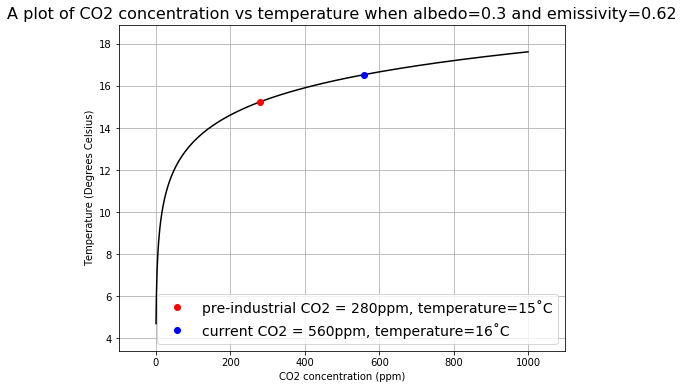

In [14]:
def find_newT(CO2_now, CO2_initial=280, e=0.62, s=5.67e-8, T_o=273, S_o=1365, al=0.3):
    dM = 5.35 * np.log(CO2_now/CO2_initial)
    M = 0.25*S_o*(1-al) + dM
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    return (M - a) / b

CO2_now = np.array([i for i in range(1,1000)])
temp_now = find_newT(CO2_now)

print("When CO2 concentration is doubled, temperature increases by %.d˚C." % (temp_now[559]-temp_now[279]))

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# plot figure
ax1.plot(CO2_now, temp_now, 'k')
ax1.plot(CO2_now[279], temp_now[279], 'ro', label='pre-industrial CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[279], temp_now[279]))
ax1.plot(CO2_now[559], temp_now[559], 'bo', label='current CO2 = %.dppm, temperature=%.d˚C' % (CO2_now[559], temp_now[559]))
ax1.set_xlabel('CO2 concentration (ppm)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of CO2 concentration vs temperature when albedo=0.3 and emissivity=0.62', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

However, the <b>best estimates for cimate sensibility is between 1.5˚C and 4˚C</b>, with more recent studies narrowing it to between 2.6˚C and 3.9˚C, which is larger than that of pure Planck response. 

This is a result of feedback mechanisms. There are two types of feedback mechanisms: <b>positive</b> and <b>negative</b>.

For a <b>positive feedback</b>, a perturbation leads to an <b>initial response</b>, which then is <b>amplified</b> by the climate system, leading to an even more drastic change. For example, higher concentration of greenhouse gases leads to warming, which causes more ice to melt, exposing surfaces of lower albedo (ocean or land), thus absorbing more energy and leading to even more warming. This is known as the ice-albedo feedback.

In contrast, for a <b>negative feedback</b>, the <b>initial response</b> caused by some disruption is <b>reduced</b> by the climate system, dampening the change in the system. For instance, more greenhouse gases leads to warming, leading to higher evaporation rates and more low-level clouds, reducing incoming solar irradiation and thus warming.

Therefore, <b>positive feedbacks</b> leads to larger warming than pure Planck response.

<img src="../images/positive-feedback.png" />
<img src="../images/negative-feedback.png" />

## Storing heat 

Recall that heat capacity (C) is the energy (E) required to raise the temperature of a body of a material by 1˚C, independent of mass.

$C=\frac{E}{∆T}$ $J˚C^{-1}$

Since most of the temperature change is due to the heat exchange with the top 70m layer of the ocean, we'll assume the contribution from land and deep ocean to heat storage is negligible, and that the ocean is 70m deep.

The density of seawater $ρ=1025kgm^{-3}$, specific heat capacity of water $c=4200Jkg^{-1}˚C^{-1}$, the fraction ($f$) which the Earth's surface is covered by ocean (70%), and depth of the ocean ($d$). From these data, we can calculate the heat capacity of the ocean per meter squared:

$$C=fρdc$$

You can verify this by looking at the units.

Substituting in the numbers, the Earth's heat capacity is $2.11*10^{8}Jm^{-2}˚C^{-1}$.

## Restoring equilibrium

After additional radiative forcings and change in energy flux density, the temperature on Earth changes to restore equilibrium. How temperature changes over time can be described by the following equation: 

$$T=\frac{1}{b}(\frac{1}{4}S_o(1-α)-a-CDe^{-\frac{b}{c}t})=\frac{1}{b}(M_{in}-a-CDe^{-\frac{b}{c}t})$$

where D is an arbitrary constant determined by initial temperature $T_{t=0}$:

$$D=\frac{\frac{1}{4}S_o(1-α)-a-T_{t=0}b}{C}$$

## Final model

Now, let's include all the concepts above into this final model.

Note that CO$_2$ is the only greenhouse gas considered, and the initial conditions are set to temperature of 14˚C and CO$_2$ concentration of 280ppm.

How many projections do you want to make? 3
How many years do you want to project into the future? 15
Please enter final CO2 concentration for projection 1 in ppm: 280
Please enter final CO2 concentration for projection 2 in ppm: 560
Please enter final CO2 concentration for projection 3 in ppm: 1000


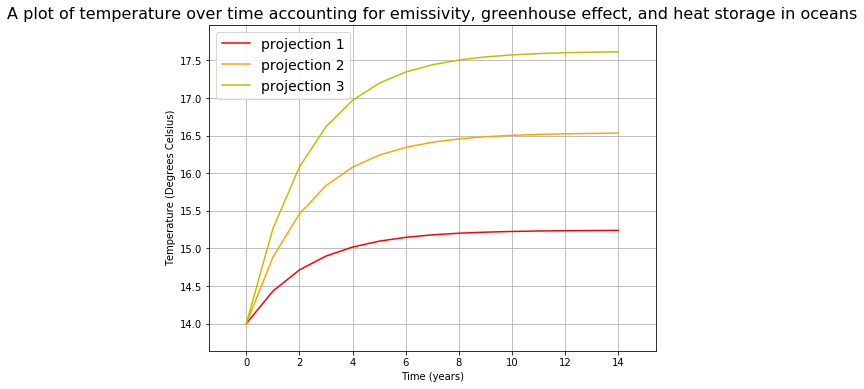

In [5]:
def simple_model(final_co2, years, current_temp=14, current_co2=280, al=0.3, e=0.62, S_o=1365, T_o=273, s=5.67e-8, f=0.7, d=70, p=1025, c=4200):
    temperature = [14] # store initial and calculated temperature into a list
    t = 0 # counter
    total_t = years # counter limit
    dM = 5.35 * np.log(final_co2/current_co2) # simplified approximation of radiative forcing from CO2
    C = f * d * p * c
    a = e * s * T_o**4
    b = 4 * e * s * T_o**3
    while t < total_t:
        t += 1
        seconds = t * 3600 * 24 * 365.25 # convert years to seconds
        M = 0.25*S_o*(1-al) + dM
        # substitute into differential equation
        D = (M-a-current_temp*b)/(C)
        temp = ((1/b)*(M-a-C*D*np.exp(-b*seconds/C)))
        temperature.append(temp)
    return temperature # output temperature list

# ask user for input
num = int(input("How many projections do you want to make? "))
time = int(input("How many years do you want to project into the future? ")) 
all_CO2_conc = [] # create list for all CO2 concentration

for i in range(num): # ask user for CO2 concentration
    CO2_conc = int(input("Please enter final CO2 concentration for projection %.d in ppm: " % (i+1)))
    all_CO2_conc.append(CO2_conc) # add user input into list
    
all_CO2_conc = np.array(all_CO2_conc)

projections = {} # create dictionary to store temperature data over time
for i in range(len(all_CO2_conc)):
    projections['CO2 concentration='+str(all_CO2_conc[i])]=[] # indexed by CO2 concentration
    for j in range(time):
        projections['CO2 concentration='+str(all_CO2_conc[i])].append(simple_model(all_CO2_conc[i], time)[j])
 

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

t = np.array([i for i in range(time)]) # make an array of years for plotting

colour = ['r', 'orange', 'y', 'g', 'b', 'purple', 'c', 'm', 'k'] # create a list of colours to choose from

# plot figure
for i in range(len(all_CO2_conc)):
    ax1.plot(t, projections['CO2 concentration='+str(all_CO2_conc[i])], colour[i], label='projection %.d' % (i+1))
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Temperature (Degrees Celsius)')
ax1.set_title('A plot of temperature over time accounting for emissivity, greenhouse effect, and heat storage in oceans', fontsize=16)
ax1.legend(loc='best', fontsize=14)
ax1.grid(True)

## Conclusion

Of course this model is still very crude. There are still plenty of things that it doesn't take into account, such as clouds, position of continents, vegetation, tipping points, etc. 

In a real climate model, other factors also have to be included such as atmospheric dynamics, climate variability, human activity, and much more. 

However, this example shows how scientists build climate models by using physical equations, making approximations or aassumptions, inserting parameters into those equations to account for any variability, and adjusting the values of the parameters so that it resembles the real world every time the model is run.

### References

- Lecture 1 material and practical in the Climate module
-  __[Penn State](https://www.e-education.psu.edu/meteo469/node/135)__
-  __[New York University Maths Department](https://math.nyu.edu/faculty/kleeman/zero_dim_ebm.html)__
- __[Myhre et al.](https://en.wikipedia.org/wiki/Planck%27s_law)__
- __[Voosen. (2020) Earth's climate destiny finally seen more clearly. Science, vol 369 no.6502, pp.354-355](https://science.sciencemag.org/content/369/6502/354?hwshib2=authn%3A1595651928%3A20200723%253A8c3c855a-1f66-4b1e-b24a-16c41f08659b%3A0%3A0%3A0%3A89%2BbUeZfMnQeCsn%2BQtPO9Q%3D%3D)__